Get scholia data - schizophrenia - clinical trials via sparql request

In [1]:
import SPARQLWrapper

sparql = SPARQLWrapper.SPARQLWrapper("https://query.wikidata.org/sparql")

query = '''
PREFIX target: <http://www.wikidata.org/entity/Q41112>

SELECT
  DISTINCT
  ?start_date
  ?trial ?trialLabel
  ?intervention ?interventionLabel
  ?sponsor ?sponsorLabel
WHERE {
  ?trial wdt:P31 wd:Q30612 ;
  wdt:P1050 / wdt:P279* target: .
  OPTIONAL {
    ?trial wdt:P580 ?starttime
    BIND(SUBSTR(STR(?starttime), 0, 11) AS ?start_date)
  }
  OPTIONAL { ?trial wdt:P4844 ?intervention }
  OPTIONAL { ?trial wdt:P859 ?sponsor }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en,da,de,es,fr,jp,nl,no,pl,ru,sv,zh". }
}
ORDER BY DESC(?starttime)
'''

# Set the query language to SPARQL
sparql.setQuery(query)

# Set the return format to JSON
sparql.setReturnFormat(SPARQLWrapper.JSON)

# Execute the query and store the results
results = sparql.query().convert()

In [2]:
import pandas as pd

dict_trials = {}

trials = []
result_list = results['results']['bindings']
for res in result_list:
    for res_key, res_value in res.items():
        if res_key == 'trial':
            uri = res_value['value']
            splitted_uri = uri.split('/')
            entity_id = splitted_uri[-1]
            trials.append(entity_id)
            dict_trials[entity_id] = res


trial_df = pd.DataFrame.from_dict(dict_trials)
trial_df = trial_df.transpose()

print(trial_df)

                                            start_date  \
Q113914424  {'type': 'literal', 'value': '2022-12-01'}   
Q113932415  {'type': 'literal', 'value': '2022-10-01'}   
Q113927226  {'type': 'literal', 'value': '2022-09-15'}   
Q113941830  {'type': 'literal', 'value': '2022-09-01'}   
Q113943405  {'type': 'literal', 'value': '2022-08-01'}   
...                                                ...   
Q66033186                                          NaN   
Q66059716                                          NaN   
Q66059719                                          NaN   
Q66068233                                          NaN   
Q67126207                                          NaN   

                                                        trial  \
Q113914424  {'type': 'uri', 'value': 'http://www.wikidata....   
Q113932415  {'type': 'uri', 'value': 'http://www.wikidata....   
Q113927226  {'type': 'uri', 'value': 'http://www.wikidata....   
Q113941830  {'type': 'uri', 'value': 'http:

In [9]:
start_dates = []

for index, row in trial_df.iterrows():
    start_date = row['start_date']
    if isinstance(start_date, dict) :
        value = start_date['value']
        start_dates.append(value)

years = []
for date in start_dates:
    year = date[0:4]
    years.append(year)


# create a dictionary to count the occurrences of each year
year_counts = {}
for year in sorted(years):
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# create the list of tuples from the dictionary
year_counts_list = [(year, year_counts[year]) for year in year_counts]

print(year_counts_list)


[('1983', 1), ('1984', 1), ('1989', 2), ('1991', 1), ('1992', 1), ('1993', 1), ('1994', 1), ('1995', 1), ('1996', 4), ('1997', 5), ('1998', 14), ('1999', 10), ('2000', 27), ('2001', 47), ('2002', 55), ('2003', 92), ('2004', 136), ('2005', 136), ('2006', 139), ('2007', 154), ('2008', 177), ('2009', 145), ('2010', 142), ('2011', 150), ('2012', 145), ('2013', 136), ('2014', 153), ('2015', 124), ('2016', 138), ('2017', 128), ('2018', 144), ('2019', 165), ('2020', 103), ('2021', 62), ('2022', 31)]


TypeError: show() got an unexpected keyword argument 'facecolor'

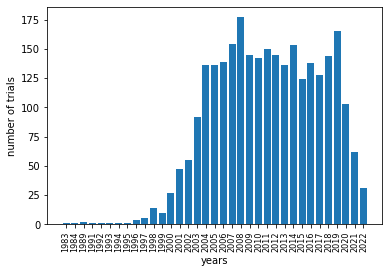

In [11]:
import matplotlib.pyplot as plt

# group the data by year
data_by_year = {}
for year, value in year_counts_list:
    if year in data_by_year:
        data_by_year[year].append(value)
    else:
        data_by_year[year] = [value]

# get the years and the values
years = list(data_by_year.keys())
values = [sum(data_by_year[year]) for year in years]

# create the bar plot
plt.bar(years, values)
plt.ylabel('number of trials')
plt.xticks(rotation=90, fontsize = 8)

plt.xlabel('years')
plt.show()
